## Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         500 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282640,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701656,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.883000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.620500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001135D530048>,
      dtype=object)

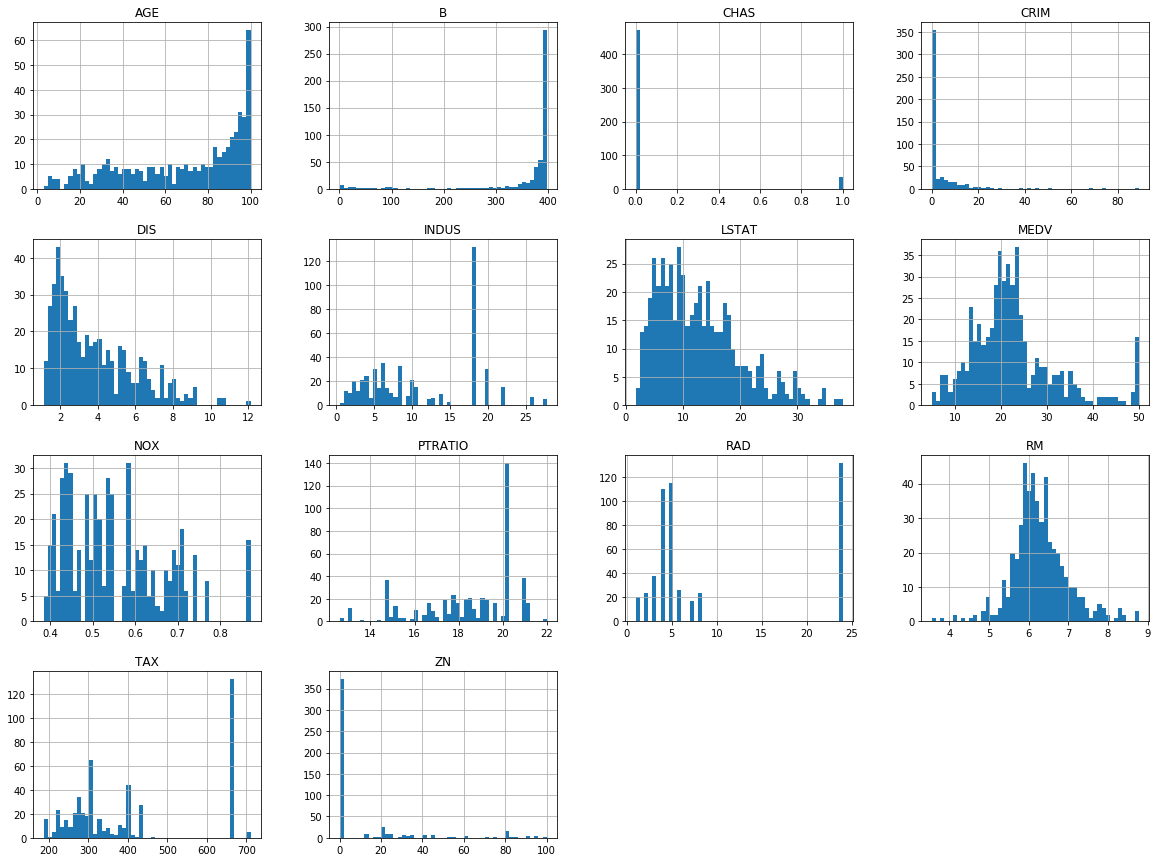

In [8]:
housing.hist(bins=50,figsize=(20,15))

In [9]:
housing['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

## Train-Test split

In [10]:
import numpy as np
def train_test_split(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices] ,data.iloc[test_indices]

In [11]:
#train_set,test_set=train_test_split(housing,0.2)

In [12]:
#print(f"training rows :{len(train_set)}\ntest rows are {len(test_set)}")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"training rows :{len(train_set)}\ntest rows are {len(test_set)}")

training rows :404
test rows are 102


In [14]:
#stratified sampling krni hogi jisse sample test puri population ko represent kre
#for eg:'CHAS' ki value 1 & 0 hai to train data mei 0&1 hona chaie jisse model confuse na ho jb use 1 ya 0 mile.
# kabhi esa hua ki train data mei 1 hai hi nhi or test mei dekhkar vo kuch bhi predict nhi kr paega 
#vo kahega tumne muje 1 to dhikhaya hi nhi to mei kese bataun
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.iloc[train_index]
    strat_test_set=housing.iloc[test_index]

In [15]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
376/28 ,95/7    # see equal quantity mei split kia 0&1 ko train and test data mei

(13.428571428571429, 13.571428571428571)

In [18]:
housing= strat_train_set.copy()

## Looking for correlation

In [19]:
corr_matrix=housing.corr()

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676376
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001135D524668>,
      dtype=object)

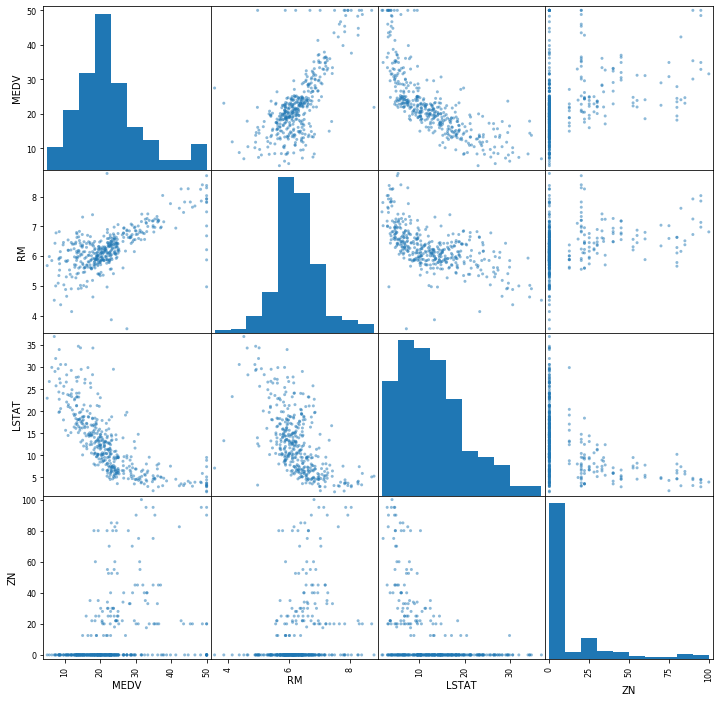

In [21]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','LSTAT','ZN']
scatter_matrix(housing[attributes],figsize=(12,12))

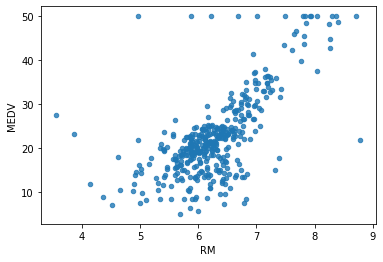

In [22]:
housing.plot(kind='scatter',x="RM",y="MEDV",alpha=0.8)

## Trying out attribute combination

In [23]:
#we can combine attributes to make single most useful attribute so that it can give some useful insight from data
housing['TAXRM']=housing['TAX']/housing['RM']
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
411    100.045065
250     50.870973
100     57.083395
429    104.388715
57      37.558685
413    129.194956
115     72.874494
490    139.603377
199     57.634409
494     65.980425
142     74.588192
113     70.912672
468    112.386095
400    111.241022
247     53.003534
151     74.574389
408    118.568631
68      61.673221
365    187.026116
81      42.453543
93      43.471261
456    111.445783
116     69.948187
27      50.768976
234     45.643770
          ...    
433    103.480423
430    104.914934
479    106.919249
438    112.215670
38      46.765002
18      56.268328
97            NaN
266     37.639008
133     75.060117
449    103.786816
477    125.565611
171     68.537415
180     24.855119
158     66.435872
279     31.708749
109     61.647134
82      44.589019
386    143.164230
418    111.801242
126     33.493675
446    105.030752
101     56.628816
277     37.210665
405    117.191624
367    172

In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.676376
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525825
LSTAT     -0.740494
Name: MEDV, dtype: float64

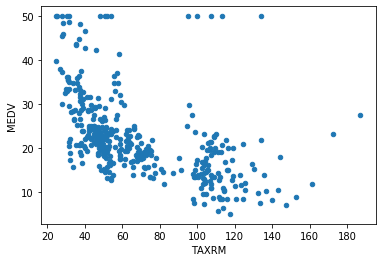

In [25]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV') # highly negative correlation

In [26]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## missing attributes

In [27]:
#to get rid of the missing values u have 3 methods:
#1:drop out th missing values
#2: drop out the whole attribute
#3: set the value to 0 ,mean,or mode,median

In [28]:
a=housing.dropna(subset=['RM']) #option1
a.shape

(398, 13)

In [29]:
housing.drop("RM",axis=1) #option2
# there is no rm column in the data

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.3920,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.4350,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.6140,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.4930,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.4930,28.9,5.4159,5,287,19.6,396.90,6.15
411,14.05070,0.0,18.10,0,0.5970,100.0,1.5275,24,666,20.2,35.05,21.22
250,0.14030,22.0,5.86,0,0.4310,13.0,7.3967,7,330,19.1,396.28,5.90
100,0.14866,0.0,8.56,0,0.5200,79.9,2.7778,5,384,20.9,394.76,9.42
429,9.33889,0.0,18.10,0,0.6790,95.6,1.9682,24,666,20.2,60.72,24.08
57,0.01432,100.0,1.32,0,0.4110,40.5,8.3248,5,256,15.1,392.90,3.95


In [30]:
median=housing['RM'].median()
median
housing['RM'].fillna(median)   #optionn3

254    6.1080
348    6.6350
476    6.4840
321    6.3760
326    6.3120
411    6.6570
250    6.4870
100    6.7270
429    6.3800
57     6.8160
413    5.1550
115    5.9280
490    5.0930
199    6.9750
494    5.9260
142    5.4030
113    6.0920
468    5.9260
400    5.9870
247    6.2260
151    5.4040
408    5.6170
68     5.5940
365    3.5610
81     6.6190
93     6.2110
456    5.9760
116    6.1760
27     6.0470
234    6.7260
        ...  
433    6.4360
430    6.3480
479    6.2290
438    5.9350
38     5.9660
18     5.4560
97     6.2135
266    7.0140
133    5.8220
449    6.4170
477    5.3040
171    5.8800
180    7.7650
158    6.0660
279    6.8120
109    6.2290
82     6.3020
386    4.6520
418    5.9570
126    5.6130
446    6.3410
101    6.7810
277    6.8260
405    5.6830
367    3.8630
155    6.1520
423    6.1030
98     7.8200
455    6.5250
216    5.8880
Name: RM, Length: 404, dtype: float64

In [31]:
housing.describe()   # before imputing misssing values,rm has 398 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,398.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277332,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711930,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.875750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median') #simpleimputer ka object bnalo and stategy median dedo and phr object ko use krlo
imputer.fit(housing)  # housing data mei fit hojao imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [33]:
imputer.statistics_    #all column median values is calculated

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X=imputer.transform(housing)

In [35]:
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()  ##now rm has 404 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276384,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.706653,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling

In [36]:
# primarily 2 types of feature scaling methods:
#1:min-max scaler(Normalization)
#    (value-min)/(max-min)
#     sklearn provides MinMaxScaler class
#2:standardization   
#    (value-mean)/std
#    sklearn provides class called Standard Scaler
    

## Scikit learn Design

## Creating Pipeline

In [37]:
from  sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                      ('std_scaler',StandardScaler())
                     ])

In [38]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [39]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [40]:
housing_num_tr.shape

(404, 13)

## selecting a Desired Model for Dragon Real Estates

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model=LinearRegression()
#model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [43]:
housing.iloc[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [44]:
some_data=housing.iloc[:5]

In [45]:
some_labels=housing_labels.iloc[:5]

In [46]:
prepared_data=my_pipeline.transform(some_data)

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [48]:
model.predict(prepared_data)

array([22.18, 26.38, 16.71, 23.19, 23.21])

## Evaluating the model

In [49]:
# from  sklearn.metrics import mean_squared_error
# housing_prediction=model.predict(housing_num_tr)
# lin_mse=mean_squared_error(housing_labels,housing_prediction)
# lin_rmse=np.sqrt(lin_mse)

In [50]:
#lin_mse # very high mse so we discard this ,means ye hai ki training data ko hi sahi predict nhi krra ,test ko to bhul hi jao

In [51]:
from  sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)

In [52]:
#mse  # decision tree ne overfit krdia jyada hi model ,thats why error is coming zero

In [53]:
from  sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)

In [54]:
lin_mse,lin_rmse

(2.2778148514851484, 1.5092431386245055)

## using better evaluation technique -cross validation

In [55]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([3.17923867, 2.9177167 , 4.96331297, 3.02437536, 3.3046577 ,
       3.08750749, 4.84165416, 3.20135987, 4.09648935, 3.43217497])

In [56]:
# from sklearn.model_selection import cross_val_score
# scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
# rmse_scores=np.sqrt(-scores)
# rmse_scores

In [57]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standarddeviation:",scores.std())

In [58]:
print_scores(rmse_scores)

scores: [3.17923867 2.9177167  4.96331297 3.02437536 3.3046577  3.08750749
 4.84165416 3.20135987 4.09648935 3.43217497]
mean: 3.604848723336032
standarddeviation: 0.7181533985255504


## saving the model

In [59]:
from joblib import dump,load
dump(model,"Dragon.joblib")

['Dragon.joblib']

## testing the model

In [60]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_prediction=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_prediction)
final_rmse=np.sqrt(final_mse)

In [61]:
final_rmse   # very good model

2.9198895359175463

In [62]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23857878, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])